In [109]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [110]:
# 데이터 불러오기

path = '../../../../data/Airbnb_London/listings.csv'

london_lists = pd.read_csv(path)

# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]

# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

temp = london_lists.copy()
raw = london_lists.copy()

# 컬럼명 확인
london_lists.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   슈퍼호스트        90463 non-null  object 
 4   숙소_지역        90852 non-null  object 
 5   숙소_특징        90852 non-null  object 
 6   숙소_유형        90852 non-null  object 
 7   수용_인원수       90852 non-null  int64  
 8   욕실수          57894 non-null  float64
 9   침실수          78118 non-null  float64
 10  침대수          57837 non-null  float64
 11  편의시설         90852 non-null  object 
 12  숙소_가격        57885 non-null  object 
 13  예약_가능여부      86773 non-null  object 
 14  리뷰수          90852 non-null  int64  
 15  12개월_리뷰수     90852 non-null  int64  
 16  30일_리뷰수      90852 non-null  int64  
 17  마지막_리뷰       65869 non-null  object 
 18  리뷰점수         65869 non-null  float64
 19  숙소_정

In [111]:
# 리뷰수가 0인 컬럼 조건 
condition_review_0 = london_lists['리뷰수'] == 0

# 별도의 DF로 저장
london_lists_review_0 = london_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = london_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트 
london_lists = london_lists[condition_review]
temp = london_lists.copy()

#숙소 유형 제거 
# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# 데이터 제거
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성 
condition_price_notnull = london_lists['숙소_가격'].notnull()
condition_price_null = london_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
london_lists_price = london_lists[condition_price_notnull] 
london_lists_price_null = london_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
london_lists = london_lists_price

#슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
london_lists = london_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거 
london_lists = london_lists[london_lists['12개월_리뷰수'] != 0]

london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거 
london_lists = london_lists[london_lists['숙소_가격'] != 0.0]

# 슈퍼호스트를 f로 바꿈 
london_lists.loc[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

#게스트 선호 컬럼 추가 
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
london_lists['게스트선호'] = 'f'
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
london_lists.loc[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'


In [112]:
london_lists.shape

(38769, 27)

이상치 처리 

In [113]:
#수용 인원수 이상치 제거 

import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column, type):
    
    condition = (df['숙소_유형'] == type)
    
    if price_column != '숙소_가격':
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
    else:
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
# 숙소 가격의 이상치 제거
remove_price_outliers(london_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(london_lists, '수용_인원수', 'Private room')
remove_price_outliers(london_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(london_lists, '숙소_가격', 'Private room')



In [114]:
london_lists.shape # 36407개가 되어야함

(36407, 27)

In [115]:
# 상관계수에 불필요한 컬럼들 제거
london_lists_clean = london_lists.drop(columns=['숙소_id', '호스트_id', '숙소_url', '편의시설','예약_가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징','게스트선호'])

In [116]:
london_lists_clean_corr = london_lists_clean.corr()

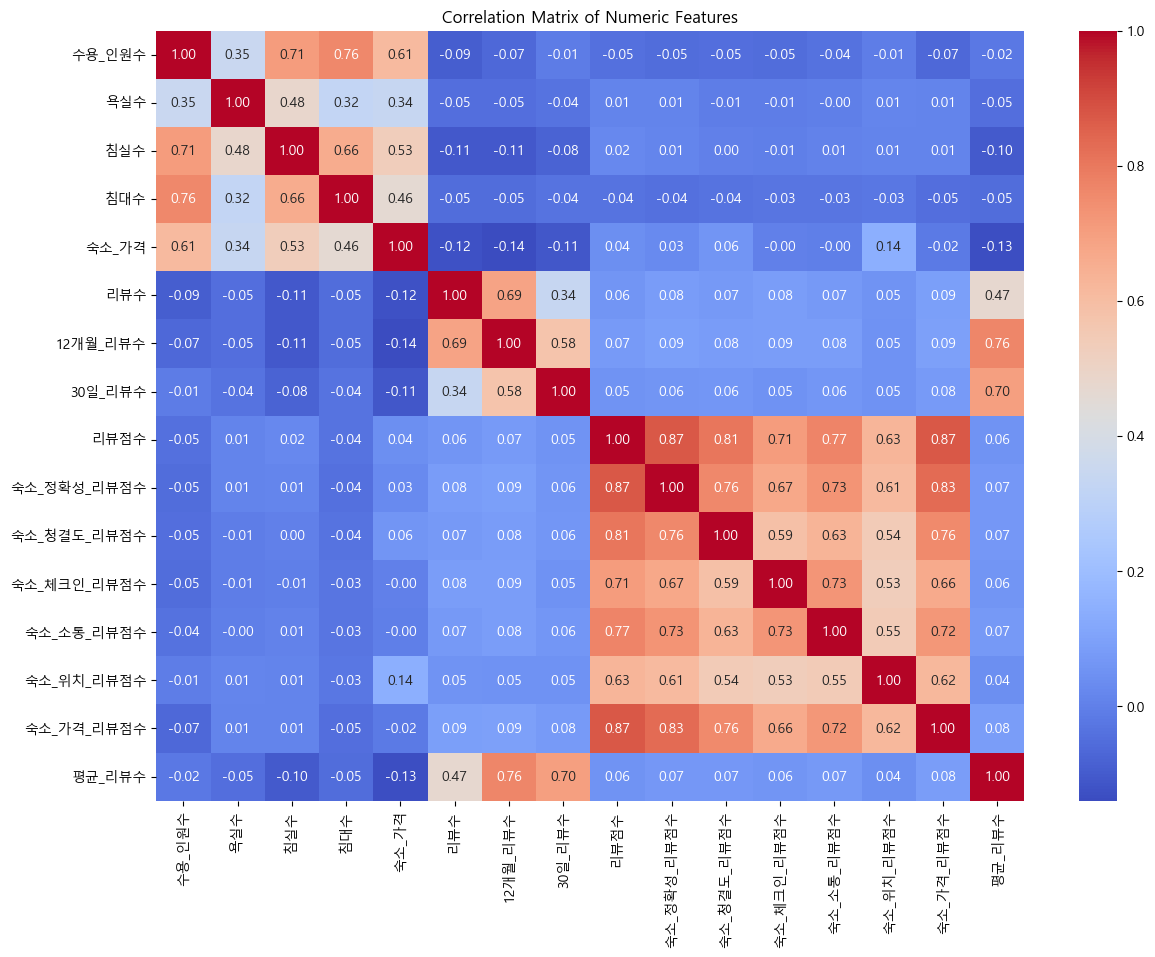

In [117]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(london_lists_clean_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

카이제곱 검정 (범주형데이터 비교)

In [118]:
london_lists_object = london_lists.select_dtypes(include='object')
london_lists_object

,숙소_url,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,편의시설,예약_가능여부,마지막_리뷰,게스트선호
0,https://www.airbnb.com/rooms/312761,t,Hackney,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",t,2024-02-03,t
1,https://www.airbnb.com/rooms/13913,t,Islington,Private room in rental unit,Private room,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,2023-11-26,f
2,https://www.airbnb.com/rooms/15400,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",t,2023-05-01,f
3,https://www.airbnb.com/rooms/159736,f,Lambeth,Private room in rental unit,Private room,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",t,2023-04-29,f
4,https://www.airbnb.com/rooms/165336,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,2024-03-17,f
...,...,...,...,...,...,...,...,...,...
90451,https://www.airbnb.com/rooms/1112236129628471308,f,Lambeth,Private room in rental unit,Private room,"[""Room-darkening shades"", ""Shampoo"", ""Mini fri...",t,2024-03-17,f
90568,https://www.airbnb.com/rooms/1112524736745357245,f,Islington,Private room in rental unit,Private room,"[""Shower gel"", ""Keypad"", ""Essentials"", ""Shampo...",t,2024-03-17,f
90590,https://www.airbnb.com/rooms/1113042462528003601,f,Camden,Entire rental unit,Entire home/apt,"[""Toaster"", ""Shampoo"", ""Mini fridge"", ""Wifi"", ...",t,2024-03-17,f
90648,https://www.airbnb.com/rooms/1113966989586525761,f,Lewisham,Entire rental unit,Entire home/apt,"[""Paid parking on premises"", ""TV"", ""Wifi"", ""Sm...",t,2024-03-19,f


In [119]:
london_lists_object.drop(columns=['숙소_url','마지막_리뷰'],axis=1, inplace=True)
london_lists_object.head()

,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,편의시설,예약_가능여부,게스트선호
0,t,Hackney,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",t,t
1,t,Islington,Private room in rental unit,Private room,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,f
2,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",t,f
3,f,Lambeth,Private room in rental unit,Private room,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",t,f
4,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,f


In [120]:
london_lists_object.reset_index(inplace=True)

In [121]:
london_lists_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36407 entries, 0 to 36406
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    36407 non-null  int64 
 1   슈퍼호스트    36407 non-null  object
 2   숙소_지역    36407 non-null  object
 3   숙소_특징    36407 non-null  object
 4   숙소_유형    36407 non-null  object
 5   편의시설     36407 non-null  object
 6   예약_가능여부  36407 non-null  object
 7   게스트선호    36407 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.2+ MB


<h3>게스트선호 기준으로 다른 컬럼과 독립성 확인</h3><br>
귀무가설 >> 두 변수 사이는 독립성이 있다 ( 연관성이 없다 )


숙소지역과 게스트선호

In [122]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['숙소_지역'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)


Chi2 Statistic: 337.70569299795363
p-value: 1.0101788246250091e-52
Degrees of Freedom: 32


숙소유형과 게스트선호

In [123]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['숙소_유형'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 472.17635346819617
p-value: 1.0769129372333727e-104
Degrees of Freedom: 1


숙소_특징과 게스트 선호

In [124]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['숙소_특징'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 1123.5958237026553
p-value: 7.777716952261943e-198
Degrees of Freedom: 57


편의시설과 게스트 선호

In [125]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['편의시설'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 35992.604099928634
p-value: 3.935316577361478e-06
Degrees of Freedom: 34801


예약가능여부와 게스트 선호

예약가능여부와는 귀무가설 채택

In [126]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['예약_가능여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1


슈퍼호스트와 게스트 선호

In [127]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['슈퍼호스트'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 17508.709815423525
p-value: 0.0
Degrees of Freedom: 1


결론 게스트선호는 예약가능여부 컬럼과는 연관성이 없음 <br>
슈퍼호스트, 편의시설, 숙소_지역, 숙소_유형, 숙소_특징은 귀무가설 기각 >> 연관성이 있다

In [128]:
london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩 


C:\Users\Master\AppData\Local\Temp\ipykernel_15788\77334718.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩


로그 변환 

In [129]:
# 숫자형 컬럼만 선별 
numeric_columns = london_lists.select_dtypes(include=['float64', 'int64']).columns

# df 복사 
london_log = london_lists.copy()

# 로그 변환
london_log[numeric_columns] = np.log1p(london_lists[numeric_columns])

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# StandardScaler 적용
scaler_standard = StandardScaler()
london_standard = london_lists.copy()
london_standard_log = london_log.copy()
london_standard[numeric_columns] = scaler_standard.fit_transform(london_lists[numeric_columns]) # 수치형 데이터만 사용
london_standard_log[numeric_columns] = scaler_standard.fit_transform(london_log[numeric_columns])

# MinMaxScaler 적용
scaler_minmax = MinMaxScaler()
london_normal = london_lists.copy()
london_normal_log = london_log.copy()
london_normal[numeric_columns] = scaler_minmax.fit_transform(london_lists[numeric_columns])
london_normal_log[numeric_columns] = scaler_minmax.fit_transform(london_log[numeric_columns])

## 회귀 분석 : 리뷰 점수 - 전체

In [215]:
london_standard_selected = london_standard[numeric_columns] #스탠다드
london_normal_selected = london_normal[numeric_columns] #민맥스
london_standard_log_selected = london_standard_log[numeric_columns]
london_normal_log_selected = london_normal_log[numeric_columns]

### 사용할 스케일링 방법 결정

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_lists = [london_standard_selected, london_normal_selected, london_standard_log_selected, london_normal_log_selected]

for df in df_lists:
    
    # 독립 변수와 종속 변수로 데이터를 나눔
    X = df.drop(columns='리뷰점수')
    y = df['리뷰점수']

    # 학습용과 테스트용으로 데이터를 나눔
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 회귀분석 모델을 만들고 학습
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # 모델 평가
    y_pred = lr.predict(X_test)

    # 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred),2)

    print('MSE: %0.2f'%mse)   
    print('RMSE: %0.2f'%rmse) 
    print('MAE: %0.2f'%mae)  
    print('결정계수(r2_score):',r2)
    print('-'*50)
    

MSE: 0.14
RMSE: 0.38
MAE: 0.21
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.12
RMSE: 0.35
MAE: 0.18
결정계수(r2_score): 0.87
--------------------------------------------------
MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.87
--------------------------------------------------


### 다중 회귀 분석

minmax 로그변환

In [217]:
# 독립 변수와 종속 변수로 데이터를 나눔
X = london_normal_log_selected.drop(columns='리뷰점수')
y = london_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)   
print('RMSE: %0.2f'%rmse) 
print('MAE: %0.2f'%mae)  
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.87


In [218]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
london_normal__log_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(london_normal__log_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:43:30   Log-Likelihood:                 73767.
No. Observations:               36407   AIC:                        -1.475e+05
Df Residuals:                   36388   BIC:                        -1.473e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0724      0.003    -24.165      

### p value < 0.05인 컬럼만 선별

In [221]:
# 독립 변수와 종속 변수로 데이터를 나눔
X = london_normal_log_selected[['수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '게스트선호']]
y = london_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)   
print('RMSE: %0.2f'%rmse) 
print('MAE: %0.2f'%mae)  
print('결정계수(r2_score):',r2)

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.87


In [222]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
london_normal__log_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(london_normal__log_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 2.103e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:45:03   Log-Likelihood:                 73764.
No. Observations:               36407   AIC:                        -1.475e+05
Df Residuals:                   36393   BIC:                        -1.474e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0714      0.003    -27.463      

## 회귀 분석 : 리뷰 점수 - 리뷰 별점 간

### 사용할 스케일링 방법 결정

In [225]:
numeric_columns_selected = ['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '게스트선호']

london_standard_selected = london_standard[numeric_columns_selected]
london_normal_selected = london_normal[numeric_columns_selected]
london_standard_log_selected = london_standard_log[numeric_columns_selected]
london_normal_log_selected = london_normal_log[numeric_columns_selected]

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_lists = [london_standard_selected, london_normal_selected, london_standard_log_selected, london_normal_log_selected]

for df in df_lists:
    
    # 독립 변수와 종속 변수로 데이터를 나눔
    X = df[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]
    y = df['리뷰점수']

    # 학습용과 테스트용으로 데이터를 나눔
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 회귀분석 모델을 만들고 학습
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # 모델 평가
    y_pred = lr.predict(X_test)

    # 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred),2)

    print('MSE: %0.2f'%mse)   
    print('RMSE: %0.2f'%rmse) 
    print('MAE: %0.2f'%mae)  
    print('결정계수(r2_score):',r2)
    print('-'*50)
    

MSE: 0.14
RMSE: 0.38
MAE: 0.21
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.00
RMSE: 0.04
MAE: 0.02
결정계수(r2_score): 0.85
--------------------------------------------------
MSE: 0.13
RMSE: 0.35
MAE: 0.18
결정계수(r2_score): 0.87
--------------------------------------------------
MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.87
--------------------------------------------------


### 다중회귀분석_normal_log


In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 독립 변수와 종속 변수로 데이터를 나눔
X = london_normal_log_selected[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]
y = london_normal_log_selected['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)

# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = round(r2_score(y_test, y_pred),2)

print('MSE: %0.2f'%mse)   
print('RMSE: %0.2f'%rmse) 
print('MAE: %0.2f'%mae)  
print('결정계수(r2_score):',r2)
print()
print('y절편: ', lr.intercept_)

MSE: 0.00
RMSE: 0.03
MAE: 0.02
결정계수(r2_score): 0.87

y절편:  -0.06855286261122784


In [228]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
london_normal__log_lr_model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(london_normal__log_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 4.486e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:47:40   Log-Likelihood:                 73510.
No. Observations:               36407   AIC:                        -1.470e+05
Df Residuals:                   36400   BIC:                        -1.469e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0694      0.003    -27.335      

## 요인 분석 

In [229]:
# 회귀분석 결과로 선택한 컬럼만 불러오기 
columns_lr_selected = ['수용_인원수', '침실수', '숙소_가격', '리뷰수', '12개월_리뷰수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '게스트선호']
london_normal[columns_lr_selected]

,수용_인원수,침실수,숙소_가격,리뷰수,12개월_리뷰수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
0,0.166667,0.1,0.302789,0.083104,0.052743,0.9925,0.9825,0.9900,1.0000,0.9725,0.9825,0.026055,1.0
1,0.000000,0.1,0.113546,0.027473,0.000000,0.9325,0.9325,0.9375,0.9575,0.9250,0.9250,0.007134,0.0
2,0.166667,0.1,0.223108,0.063874,0.002110,0.9625,0.9700,0.9700,0.9575,0.9825,0.9350,0.016129,0.0
3,0.166667,0.1,0.113546,0.065247,0.000000,0.9475,0.9150,0.9375,0.9725,0.8350,0.9150,0.018610,0.0
4,0.166667,0.1,0.183267,0.162088,0.050633,0.9700,0.9475,0.9850,0.9900,0.9675,0.9275,0.048077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90451,0.166667,0.1,0.075697,0.000000,0.000000,0.5000,0.7500,0.5000,0.7500,0.5000,0.7500,0.030397,0.0
90568,0.500000,0.1,0.139442,0.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.030397,0.0
90590,0.666667,0.2,0.254980,0.000687,0.002110,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.061414,0.0
90648,0.500000,0.1,0.201195,0.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.030397,0.0


### 최적의 n_factor값 찾기

####  Scree Plot을 사용한 고유값 분석

d:\Anaconda\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO: 0.8165088528391355, Bartlett p-value: 0.0


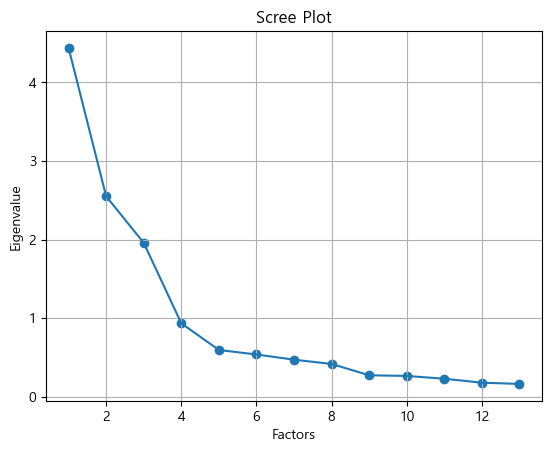

In [232]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO와 Bartlett 테스트
kmo_all, kmo_model = calculate_kmo(london_normal[columns_lr_selected])
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(london_normal[columns_lr_selected])
print(f"KMO: {kmo_model}, Bartlett p-value: {bartlett_p_value}")

# 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(london_normal[columns_lr_selected])
ev, v = fa.get_eigenvalues()

# Scree Plot
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


#### 분산 설명 기준

d:\Anaconda\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


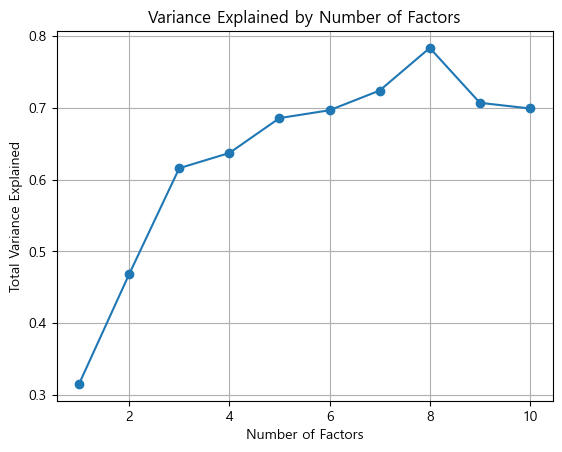

In [233]:
# 요인 수를 1부터 10까지 변화시키며 분산 설명 비율 계산
total_variance = []
for n in range(1, 11):
    fa = FactorAnalyzer(n_factors=n, rotation="varimax")
    fa.fit(london_normal[columns_lr_selected])
    total_variance.append(fa.get_factor_variance()[1].sum())

plt.plot(range(1, 11), total_variance, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Total Variance Explained')
plt.title('Variance Explained by Number of Factors')
plt.grid()
plt.show()

#### 평행 분석

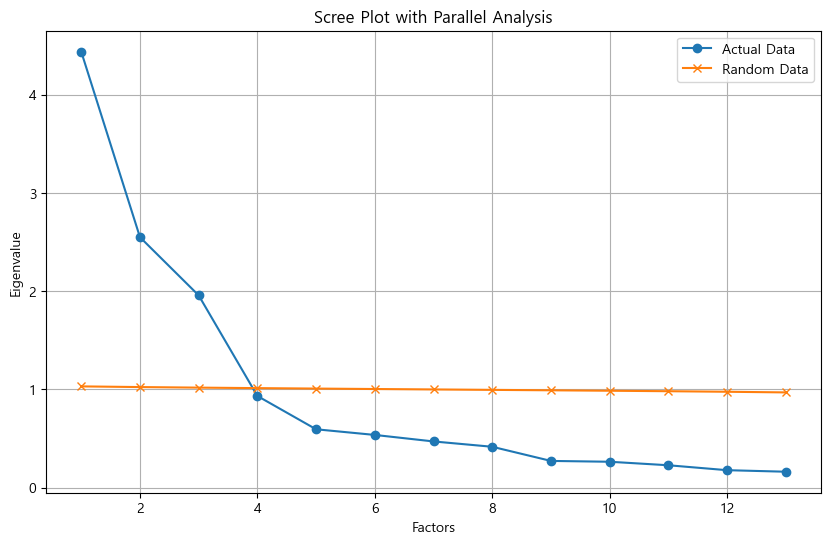

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# 데이터 준비
data = london_normal[columns_lr_selected]

# 실제 데이터의 고유값 계산
fa = FactorAnalyzer(n_factors=len(columns_lr_selected), rotation=None)
fa.fit(data)
ev, v = fa.get_eigenvalues()

# 무작위 데이터의 고유값 계산 함수
def get_random_eigenvalues(data, n_iter=1000):
    random_ev = []
    for _ in range(n_iter):
        random_data = np.random.normal(size=data.shape)
        fa.fit(random_data)
        ev, _ = fa.get_eigenvalues()
        random_ev.append(ev)
    return np.mean(random_ev, axis=0)

# 무작위 데이터의 평균 고유값 계산
random_ev = get_random_eigenvalues(data)

# Scree Plot 및 평행 분석 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', label='Actual Data')
plt.plot(range(1, len(random_ev) + 1), random_ev, marker='x', label='Random Data')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Parallel Analysis')
plt.legend()
plt.grid()
plt.show()


In [235]:
# 평행 분석 결과 기반 요인 수 결정
n_factors_parallel = np.sum(ev > random_ev)
print(f"Parallel Analysis suggests {n_factors_parallel} factors")

Parallel Analysis suggests 3 factors


## 요인분석

In [236]:
# 선택된 요인 수로 요인 분석 수행
fa = FactorAnalyzer(n_factors=n_factors_parallel, rotation="varimax")
fa.fit(data)

# 데이터프레임화
london_loadings = pd.concat(
    [pd.DataFrame(fa.loadings_, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)]),
     pd.DataFrame(data.columns.tolist(), columns=['name of columns'])],
    axis=1
)
london_loadings

,Factor1,Factor2,Factor3,name of columns
0,-0.062518,-0.006054,0.911205,수용_인원수
1,0.007291,-0.070232,0.770887,침실수
2,0.040063,-0.114275,0.678567,숙소_가격
3,0.061743,0.655975,-0.085041,리뷰수
4,0.052070,1.005417,-0.054357,12개월_리뷰수
5,0.906044,0.038595,0.004517,숙소_정확성_리뷰점수
6,0.808172,0.040725,0.010612,숙소_청결도_리뷰점수
7,0.768532,0.043473,-0.014756,숙소_체크인_리뷰점수
8,0.821597,0.041251,-0.004727,숙소_소통_리뷰점수
9,0.677381,0.016314,0.060354,숙소_위치_리뷰점수


In [237]:
london_loadings[london_loadings['Factor1'] >= 0.6]

,Factor1,Factor2,Factor3,name of columns
5,0.906044,0.038595,0.004517,숙소_정확성_리뷰점수
6,0.808172,0.040725,0.010612,숙소_청결도_리뷰점수
7,0.768532,0.043473,-0.014756,숙소_체크인_리뷰점수
8,0.821597,0.041251,-0.004727,숙소_소통_리뷰점수
9,0.677381,0.016314,0.060354,숙소_위치_리뷰점수
10,0.900110,0.050109,-0.019708,숙소_가격_리뷰점수


Factor1에서 높은 유사성을 나타낸 값들<br>
 
5  숙소_정확성_리뷰점수<br>
6  숙소_청결도_리뷰점수<br>
7  숙소_체크인_리뷰점수<br>
8  숙소_소통_리뷰점수<br>
9  숙소_위치_리뷰점수<br>
10  숙소_가격_리뷰점수<br>

Factor1 = 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성

In [238]:
london_loadings[london_loadings['Factor2'] >= 0.6]

,Factor1,Factor2,Factor3,name of columns
3,0.061743,0.655975,-0.085041,리뷰수
4,0.052070,1.005417,-0.054357,12개월_리뷰수
11,0.043219,0.743078,-0.044745,평균_리뷰수


Factor2에서 높은 유사성을 나타낸 값들<br>
 
3  리뷰수<br>
4  12개월_리뷰수<br>
11  평균_리뷰수<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

In [239]:
london_loadings[london_loadings['Factor3'] >= 0.6]


,Factor1,Factor2,Factor3,name of columns
0,-0.062518,-0.006054,0.911205,수용_인원수
1,0.007291,-0.070232,0.770887,침실수
2,0.040063,-0.114275,0.678567,숙소_가격


Factor3에서 높은 유사성을 나타낸 값들<br>
 
0  수용_인원수<br>
1  침실수<br>
2  숙소_가격<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor3 라는 잠재 변수를 생성한 것임.

In [240]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=data.columns))

                    0         1         2
수용_인원수      -0.062518 -0.006054  0.911205
침실수          0.007291 -0.070232  0.770887
숙소_가격        0.040063 -0.114275  0.678567
리뷰수          0.061743  0.655975 -0.085041
12개월_리뷰수     0.052070  1.005417 -0.054357
숙소_정확성_리뷰점수  0.906044  0.038595  0.004517
숙소_청결도_리뷰점수  0.808172  0.040725  0.010612
숙소_체크인_리뷰점수  0.768532  0.043473 -0.014756
숙소_소통_리뷰점수   0.821597  0.041251 -0.004727
숙소_위치_리뷰점수   0.677381  0.016314  0.060354
숙소_가격_리뷰점수   0.900110  0.050109 -0.019708
평균_리뷰수       0.043219  0.743078 -0.044745
게스트선호        0.200791  0.139090 -0.047437


In [241]:
london_factors = pd.DataFrame(loadings, index=data.columns, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
london_factors

,Factor1,Factor2,Factor3
수용_인원수,-0.062518,-0.006054,0.911205
침실수,0.007291,-0.070232,0.770887
숙소_가격,0.040063,-0.114275,0.678567
리뷰수,0.061743,0.655975,-0.085041
12개월_리뷰수,0.052070,1.005417,-0.054357
숙소_정확성_리뷰점수,0.906044,0.038595,0.004517
숙소_청결도_리뷰점수,0.808172,0.040725,0.010612
숙소_체크인_리뷰점수,0.768532,0.043473,-0.014756
숙소_소통_리뷰점수,0.821597,0.041251,-0.004727
숙소_위치_리뷰점수,0.677381,0.016314,0.060354


0.6 이상 <br>

- Factor1 : 숙소_정확성_리뷰점수, 숙소_청결도_리뷰점수, 숙소_체크인_리뷰점수, 숙소_소통_리뷰점수, 숙소_위치_리뷰점수, 숙소_가격_리뷰점수
- Factor2 : 리뷰수, 12개월_리뷰수, 평균_리뷰수
- Factor3 : 수용_인원수, 침실수, 숙소_가격
- Factor4 : 없음

In [242]:
# 요인 점수 추출
factor_scores = fa.transform(data)

# DF 화
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i + 1}' for i in range(n_factors_parallel)])
factor_scores_df

,Factor1,Factor2,Factor3
0,0.628718,0.866522,-0.432301
1,0.100038,-0.808698,-1.143165
2,0.340053,-0.785555,-0.605581
3,0.046740,-0.849759,-0.780382
4,0.323727,0.672199,-0.608328
...,...,...,...
36402,-3.004964,-0.542302,-0.961450
36403,0.710484,-0.682963,0.189336
36404,0.708756,-0.647723,0.995479
36405,0.721725,-0.688643,0.240732


In [245]:
factor_scores_df.to_csv('../../../../data/Airbnb_London/factor_scores.csv', encoding='utf-8', index=False)

PCA 분석 

In [131]:
# 상관계수에 불필요한 컬럼들 제거
guest_listing = london_lists.drop(columns=['숙소_id', '호스트_id', '숙소_url', '편의시설','예약_가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])

숙소 각 리뷰분야로 pca 진행

In [132]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

x = guest_listing.values
y = guest_listing['게스트선호'].values

# 결측값 처리 (필요시)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=4)  # 주성분의 수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4'])

df_pca.head()

,pc1,pc2,pc3,pc4
0,-1.893289,1.182701,0.108322,2.628435
1,-0.087817,0.989875,-1.761424,-0.232230
2,-0.708629,0.670596,-1.083098,-0.301446
3,0.194041,1.076015,-1.071146,-0.210947
4,-1.199234,2.225917,1.441184,-0.498654


In [133]:
df_pca

,pc1,pc2,pc3,pc4
0,-1.893289,1.182701,0.108322,2.628435
1,-0.087817,0.989875,-1.761424,-0.232230
2,-0.708629,0.670596,-1.083098,-0.301446
3,0.194041,1.076015,-1.071146,-0.210947
4,-1.199234,2.225917,1.441184,-0.498654
...,...,...,...,...
36402,7.868051,2.073640,-0.377994,0.564876
36403,-1.477861,-0.885523,-0.483055,-0.510471
36404,-1.521341,-1.459406,0.717999,-0.891455
36405,-1.572296,0.295950,-1.261727,-0.644181


In [134]:
pca.explained_variance_ratio_

array([0.31299452, 0.19554665, 0.15153329, 0.05562461])

In [135]:
sum(pca.explained_variance_ratio_)

0.7156990733609372

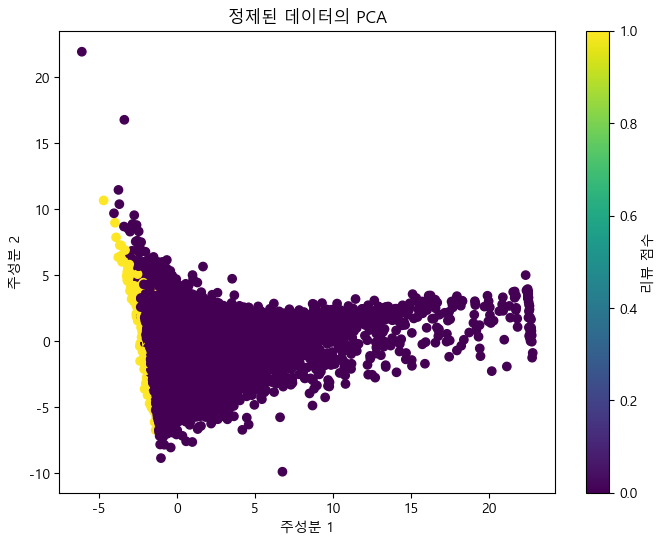

In [136]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2']  ,c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

pca로 회귀분석

In [137]:
import statsmodels.api as sm

df_reg = pd.concat([df_pca, pd.DataFrame(y, columns=['게스트선호'])], axis=1)
# 종속변수와 독립변수 선택
X = df_reg[['pc1', 'pc2', 'pc3', 'pc4']]
y = df_reg['게스트선호']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  게스트선호   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.489e+05
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:38:36   Log-Likelihood:                 49929.
No. Observations:               36407   AIC:                        -9.985e+04
Df Residuals:                   36402   BIC:                        -9.981e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1217      0.000    378.195      0.0

pc1 + pc2 =  70% 

In [138]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_reg[['pc1', 'pc2']]
y = df_reg['게스트선호']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  게스트선호   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1621.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:38:36   Log-Likelihood:                -9404.5
No. Observations:               36407   AIC:                         1.881e+04
Df Residuals:                   36404   BIC:                         1.884e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1217      0.002     74.121      0.0

pca로 회귀분석

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_reg, pd.DataFrame(y, columns=['게스트선호'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_reg.values  # 주성분들의 값만 추출
y = df_reg['게스트선호'].values  # 종속변인 추출

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [140]:
# 모델 평가
y_pred = lr.predict(X_test)

In [141]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.00
RMSE: 0.00
MAE: 0.00


In [142]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
print('y절편: ', np.round(lr.intercept_,2))

결정계수(r2_score): 1.0
y절편:  -0.0


공통요인분석진행

In [143]:
!pip install factor-analyzer

In [144]:
guest_listing

,수용_인원수,욕실수,침실수,침대수,숙소_가격,리뷰수,12개월_리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
0,2,1.0,1.0,1.0,160.0,122,26,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,1
1,1,1.0,1.0,1.0,65.0,41,1,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,0
2,2,1.0,1.0,1.0,120.0,94,2,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,0
3,2,1.0,1.0,1.0,65.0,96,1,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62,0
4,2,1.0,1.0,1.0,100.0,237,25,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90451,2,1.0,1.0,1.0,46.0,1,1,1,3.00,3.00,4.00,3.00,4.00,3.00,4.00,1.00,0
90568,4,2.0,1.0,2.0,78.0,1,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0
90590,5,1.0,2.0,3.0,136.0,2,2,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,0
90648,4,1.0,1.0,0.0,109.0,1,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0


In [145]:
non_guest_listing = guest_listing.drop(columns=['게스트선호'])

In [146]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(non_guest_listing)

print(fa.loadings_)



[[ 0.02094209  0.82099048]
 [ 0.04507014  0.45608175]
 [ 0.08004444  0.80939191]
 [ 0.02363135  0.735156  ]
 [ 0.09003095  0.66128294]
 [ 0.09765279 -0.26548059]
 [ 0.11200917 -0.30472819]
 [ 0.08666432 -0.23507809]
 [ 0.94940533 -0.05371755]
 [ 0.90437666 -0.06708968]
 [ 0.8133167  -0.05934819]
 [ 0.75917505 -0.0742732 ]
 [ 0.81582469 -0.06951676]
 [ 0.67367279 -0.00724381]
 [ 0.89925987 -0.08821381]
 [ 0.09446952 -0.28093528]]


In [147]:
#결과를 데이터프레임화 
london_loadings = pd.DataFrame(fa.loadings_, columns=['Factor1','Factor2'])
london_loadings

,Factor1,Factor2
0,0.020942,0.820990
1,0.045070,0.456082
2,0.080044,0.809392
3,0.023631,0.735156
4,0.090031,0.661283
5,0.097653,-0.265481
6,0.112009,-0.304728
7,0.086664,-0.235078
8,0.949405,-0.053718
9,0.904377,-0.067090


In [148]:
london_loadings[london_loadings['Factor1'] >= 0.6]

,Factor1,Factor2
8,0.949405,-0.053718
9,0.904377,-0.067090
10,0.813317,-0.059348
11,0.759175,-0.074273
12,0.815825,-0.069517
13,0.673673,-0.007244
14,0.899260,-0.088214


Factor1에서 높은 유사성을 나타낸 값들<br>
 
8  리뷰점수<br>
9  숙소_정확성_리뷰점수<br>
10  숙소_청결도_리뷰점수<br>
11  숙소_체크인_리뷰점수<br>
12  숙소_소통_리뷰점수<br>
13  숙소_위치_리뷰점수<br>
14  숙소_가격_리뷰점수<br>



해당 결과는 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성한 것임.

In [149]:
london_loadings[london_loadings['Factor2'] >= 0.6]


,Factor1,Factor2
0,0.020942,0.820990
2,0.080044,0.809392
3,0.023631,0.735156
4,0.090031,0.661283


Factor1에서 높은 유사성을 나타낸 값들<br>
 
0  수용인원수<br>
2  침실수<br>
3  침대수<br>
4  숙소_가격<br>
해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

In [150]:
from factor_analyzer import  FactorAnalyzer
import matplotlib.pyplot as plt 

fa = FactorAnalyzer(rotation=None, n_factors=london_lists_clean.shape[1], method = 'principal')
fa.fit(london_lists_clean)

#고윳값 확인 
ev, v = fa.get_eigenvalues()
print(ev)

[5.2627827  3.31624023 2.57053036 0.77993009 0.72444726 0.64267731
 0.48980863 0.44337291 0.31560253 0.30892882 0.27158476 0.23188991
 0.20349692 0.17264605 0.1617874  0.10427413]


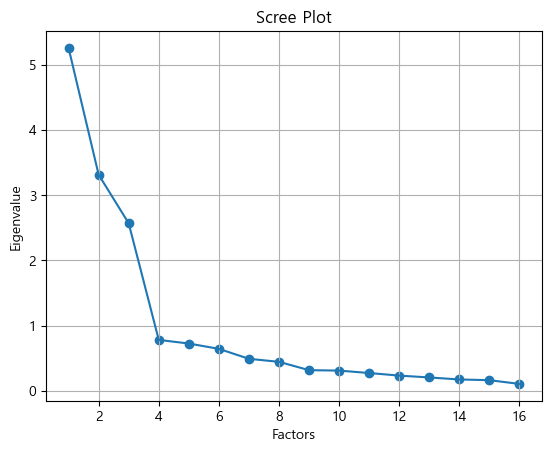

In [151]:
# 스크리 플롯으로 요인 수 결정
plt.scatter(range(1, london_lists_clean.shape[1]+1), ev)
plt.plot(range(1, london_lists_clean.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [152]:
#고윳값이 1 이상인 요인들은 데이터 집합의 중요한 변동성을 설명한다고 볼수 있다 
#고윳값이 1 이상인 요인 뽑기 

n_factors = sum(ev > 1)

fa = FactorAnalyzer(rotation="varimax", n_factors=n_factors)
fa.fit(london_lists_clean)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [153]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=london_lists_clean.columns))

                    0         1         2
수용_인원수      -0.051485  0.898191  0.003329
욕실수          0.009381  0.465133 -0.033178
침실수          0.018262  0.831266 -0.070677
침대수         -0.040192  0.788906 -0.003384
숙소_가격        0.046766  0.646759 -0.121933
리뷰수          0.056883 -0.082474  0.608019
12개월_리뷰수     0.050543 -0.062030  0.921802
30일_리뷰수      0.036193 -0.030443  0.677636
리뷰점수         0.954703  0.004116  0.025080
숙소_정확성_리뷰점수  0.907844 -0.005940  0.042661
숙소_청결도_리뷰점수  0.815499 -0.002762  0.043308
숙소_체크인_리뷰점수  0.762045 -0.019576  0.046456
숙소_소통_리뷰점수   0.818147 -0.010590  0.048881
숙소_위치_리뷰점수   0.673255  0.036167  0.022688
숙소_가격_리뷰점수   0.902469 -0.022636  0.057590
평균_리뷰수       0.032532 -0.042696  0.867455


In [154]:
london_factors = pd.DataFrame(loadings, index=london_lists_clean.columns)
london_factors.rename(columns={0 : '요인1',1 : '요인2', 2 : '요인3'}, inplace=True)

In [155]:
london_factors

,요인1,요인2,요인3
수용_인원수,-0.051485,0.898191,0.003329
욕실수,0.009381,0.465133,-0.033178
침실수,0.018262,0.831266,-0.070677
침대수,-0.040192,0.788906,-0.003384
숙소_가격,0.046766,0.646759,-0.121933
리뷰수,0.056883,-0.082474,0.608019
12개월_리뷰수,0.050543,-0.062030,0.921802
30일_리뷰수,0.036193,-0.030443,0.677636
리뷰점수,0.954703,0.004116,0.025080
숙소_정확성_리뷰점수,0.907844,-0.005940,0.042661


0.6 이상 <br>

- 0 : 리뷰점수, 정확성, 청결도, 체크인, 소통, 위치, 가격 
- 1 : 수용인원수, 침실수, 침대수, 숙소가격, 
- 2 : 리뷰수, 12개월리뷰수, 30일 리뷰수, 평균리뷰수

In [156]:
#요인 점수 계산 

factor_scores = fa.transform(london_lists_clean)
print(factor_scores)

[[ 0.6125538  -0.56328479  0.35973544]
 [ 0.16160733 -1.02687606 -0.81428274]
 [ 0.31564212 -0.63719671 -0.67649469]
 ...
 [ 0.69689922  1.03769131 -0.07582197]
 [ 0.72085758 -0.1655241  -0.50909452]
 [ 0.71438513 -0.71645773 -0.54088661]]


회귀 모델 분석 

리뷰점수

In [157]:
 
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = london_lists['리뷰점수']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 2.208e+05
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:39:14   Log-Likelihood:                 30413.
No. Observations:               36407   AIC:                        -6.082e+04
Df Residuals:                   36403   BIC:                        -6.078e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6933      0.001   8532.642      0.0

숙소 가격

- 설명력이 떨어짐 

In [158]:
 
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = london_lists['숙소_가격']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.120e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:39:14   Log-Likelihood:            -2.0311e+05
No. Observations:               36407   AIC:                         4.062e+05
Df Residuals:                   36403   BIC:                         4.063e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.9294      0.336    404.761      0.0

-요인분석을 대입하여 진행

- 로지스틱 회귀 분석 이진분류(0,1) - 게스트선호

In [159]:
london_lists_clean.columns

Index(['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [160]:
guest_listing

,수용_인원수,욕실수,침실수,침대수,숙소_가격,리뷰수,12개월_리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,게스트선호
0,2,1.0,1.0,1.0,160.0,122,26,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,1
1,1,1.0,1.0,1.0,65.0,41,1,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,0
2,2,1.0,1.0,1.0,120.0,94,2,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,0
3,2,1.0,1.0,1.0,65.0,96,1,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62,0
4,2,1.0,1.0,1.0,100.0,237,25,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90451,2,1.0,1.0,1.0,46.0,1,1,1,3.00,3.00,4.00,3.00,4.00,3.00,4.00,1.00,0
90568,4,2.0,1.0,2.0,78.0,1,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0
90590,5,1.0,2.0,3.0,136.0,2,2,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,0
90648,4,1.0,1.0,0.0,109.0,1,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0


In [161]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 독립 변수와 종속 변수 분리
X = guest_listing.drop(columns=['게스트선호'])
y = guest_listing['게스트선호']

In [162]:
# 요인 분석 모델 생성 및 피팅
fa = FactorAnalysis(n_components=3, random_state=42)
factors = fa.fit_transform(X)

# 요인 점수를 데이터프레임으로 변환
factor_df = pd.DataFrame(factors, columns=['Factor1', 'Factor2', 'Factor3'])

In [163]:
# 데이터 분할 (훈련 세트와 테스트 세트)
x_train, x_test, y_train, y_test = train_test_split(factor_df, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

# 예측
y_pred = lr.predict(x_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 예측 결과 출력
print("Predicted values:", y_pred)
print("True values:", y_test.values)

Accuracy: 0.8810766273001922
Predicted values: [0 0 0 ... 0 0 0]
True values: [0 0 0 ... 0 0 0]


In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('정확도 : {0: .3f}, 정밀도 : {1: .3f}, 재현율 : {2: .3f}, f1 : {3: .3f}'. format(acc,precision, recall, f1))
print('ROC_AUC: {0:.3f}'.format(roc_auc))

정확도 :  0.881, 정밀도 :  0.516, 재현율 :  0.037, f1 :  0.069
ROC_AUC: 0.516


의사결정 트리 

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns

# 독립 변수와 종속 변수 분리
X = guest_listing.drop(columns=['게스트선호'])
y = guest_listing['게스트선호']

# 요인 분석 모델 생성 및 피팅
fa = FactorAnalysis(n_components=3, random_state=42)
factors = fa.fit_transform(X)

# 요인 점수를 데이터프레임으로 변환
factor_df = pd.DataFrame(factors, columns=['Factor1', 'Factor2', 'Factor3'])

# 종속 변수와 결합
london_reg = pd.concat([factor_df, y.reset_index(drop=True)], axis=1)

In [166]:
# 독립 변수와 종속 변수 분리
X = london_reg[['Factor1', 'Factor2', 'Factor3']]
y = london_reg['게스트선호']


# 학습용과 테스트용으로 데이터를 나눔
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# 예측
y_pred = dt.predict(x_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print('의사결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# 예측 결과 출력
print("Predicted values:", y_pred)
print("True values:", y_test.values)

의사결정 트리 예측 정확도 : 0.8827
Predicted values: [0 0 0 ... 0 0 0]
True values: [0 0 0 ... 0 0 0]


In [167]:
from sklearn.metrics import mean_squared_error

# 모델 예측
y_pred = dt.predict(x_test[:10])

# 평가
mse = mean_squared_error(y_test[:10], y_pred[:10])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2


In [168]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test[:10], y_pred[:10])
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8000


pca 로 로지스틱회귀

In [169]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 독립 변수와 종속 변수 분리
X = guest_listing.drop(columns=['게스트선호'])
y = guest_listing['게스트선호']

#pca 수행  
# PCA 모델 생성 및 피팅
pca = PCA(n_components=4)  # 예시로 3개의 주성분을 사용
principal_components = pca.fit_transform(X)

# 주성분 점수를 데이터프레임으로 변환
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3','PC4'])

In [170]:
# 데이터 분할 (훈련 세트와 테스트 세트)
x_train, x_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

# 예측
y_pred = lr.predict(x_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print('로지스틱 회귀 예측 정확도 : {0:.4f}'.format(accuracy))

# 예측 결과 출력
print("Predicted values:", y_pred)
print("True values:", y_test.values)

로지스틱 회귀 예측 정확도 : 0.8789
Predicted values: [0 0 0 ... 0 0 0]
True values: [0 0 0 ... 0 0 0]


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('정확도 : {0: .3f}, 정밀도 : {1: .3f}, 재현율 : {2: .3f}, f1 : {3: .3f}'. format(acc,precision, recall, f1))
print('ROC_AUC: {0:.3f}'.format(roc_auc))

정확도 :  0.879, 정밀도 :  0.208, 재현율 :  0.006, f1 :  0.011
ROC_AUC: 0.501


pca - 의사결정트리

In [172]:
# 독립 변수와 종속 변수 분리
X = pca_df
y = guest_listing['게스트선호']

# 학습용과 테스트용으로 데이터를 나눔
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정 트리 모델 생성 및 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# 예측
y_pred = dt.predict(x_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print('의사결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# 예측 결과 출력
print("Predicted values:", y_pred)
print("True values:", y_test.values)

의사결정 트리 예측 정확도 : 0.8043
Predicted values: [1 0 0 ... 0 0 0]
True values: [0 0 0 ... 0 0 0]


로지스틱 회귀 분석 이진분류(0,1) - 게스트선호

In [173]:
london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩 

In [174]:

london_lists_clean.columns

Index(['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [175]:
london_numbric = london_lists[['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수','게스트선호']]

In [176]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

In [177]:
numbric_scaled = scaler.fit_transform(london_numbric)

In [178]:
numbric_scaled

array([[-0.6824337 , -0.54416075, -0.49683311, ...,  0.66751366,
        -0.32367736,  2.68634132],
       [-1.32656322, -0.54416075, -0.49683311, ...,  0.1935192 ,
        -0.77884686, -0.37225352],
       [-0.6824337 , -0.54416075, -0.49683311, ...,  0.27595302,
        -0.5624548 , -0.37225352],
       ...,
       [ 1.24995486, -0.54416075,  0.86646226, ...,  0.81177284,
         0.52696726, -0.37225352],
       [ 0.60582534, -0.54416075, -0.49683311, ...,  0.81177284,
        -0.21921223, -0.37225352],
       [-0.6824337 , -0.54416075, -0.49683311, ...,  0.81177284,
        -0.21921223, -0.37225352]])

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [180]:
y = london_numbric['게스트선호'] # 종속변수
x = numbric_scaled # 독립변수(예측하기 위한 변수들)

In [181]:
# 훈련용/ 평가용 데이터 분할 

x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size=0.3, random_state=42)

In [182]:
#모델 생성 
lr = LogisticRegression()

In [183]:
# 모델 훈련
lr.fit(x_train, y_train)

LogisticRegression()

In [184]:
#평가 데이터에 대한 예측값  y_pred
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [185]:
y_test

54041    0
86354    0
79271    0
75055    0
16609    0
        ..
56137    0
50818    1
77820    0
71342    0
78339    1
Name: 게스트선호, Length: 10923, dtype: int64

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [187]:
#혼동행렬(오차행렬)
confusion_matrix(y_test, y_pred)

array([[9639,    0],
       [   0, 1284]], dtype=int64)

In [188]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [189]:
print('정확도 : {0: .3f}, 정밀도 : {1: .3f}, 재현율 : {2: .3f}, f1 : {3: .3f}'. format(acc,precision, recall, f1))


정확도 :  1.000, 정밀도 :  1.000, 재현율 :  1.000, f1 :  1.000


In [190]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 1.000


결과 >> 에측값과 게스트선호값이 100%동일

<h2>의사결정트리 모델링</h2>

연속형 목표 변수 예측(실수값/특정범위 내의 모든 값을 가질수 있다) >>  DecisionTreeRegressor<br>
이산형 목표 변수를 예측(정수값 / 하나의 값만 가질수 있다 ) >> DecisionTreeClassifier<br>

우리 데이터의 '리뷰점수'는 연속형 목표 변수 / 게스트선호(0,1) 이산형 목표변수로 볼수 있음

<h3>리뷰점수(연속형 변수)기준으로 모델링</h3>

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns

In [192]:
london_lists.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약_가능여부', '리뷰수',
       '12개월_리뷰수', '30일_리뷰수', '마지막_리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호'],
      dtype='object')

In [193]:
# features = ['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수', '평균_리뷰수']
features = ['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']


target = '리뷰점수'

In [194]:
x = london_lists[features]
y = london_lists[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

                                                    

의사결정트리 모델 훈련 

In [195]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train[:10], y_train[:10])

DecisionTreeRegressor(random_state=42)

모델 예측

In [196]:
y_pred = tree_model.predict(x_test)
y_pred

array([4.88, 4.88, 4.88, ..., 4.88, 4.42, 4.88])

In [197]:
y_test

54041    4.80
86354    5.00
79271    4.64
75055    4.75
16609    4.71
         ... 
4732     4.81
31946    4.73
33032    4.53
46351    3.71
31331    4.57
Name: 리뷰점수, Length: 7282, dtype: float64

모델 평가

In [198]:
from sklearn.metrics import mean_squared_error

# 모델 예측
y_pred = tree_model.predict(x_test[:10])

# 평가
mse = mean_squared_error(y_test[:10], y_pred[:10])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.022070000000000024


<h3>전체 데이터를 시각화하면 너무 빽뺵하고 지저분해서 10개만 시각화</h3><br>

- squared_error:  평균제곱오차(mse) 적을 수록 예측이 정확하다는 뜻 
- samples : 헤당 노드에 속하는 샘플의 수 (노드에 포함된 데이터 수 )
- value : 목표변수의 평균값 

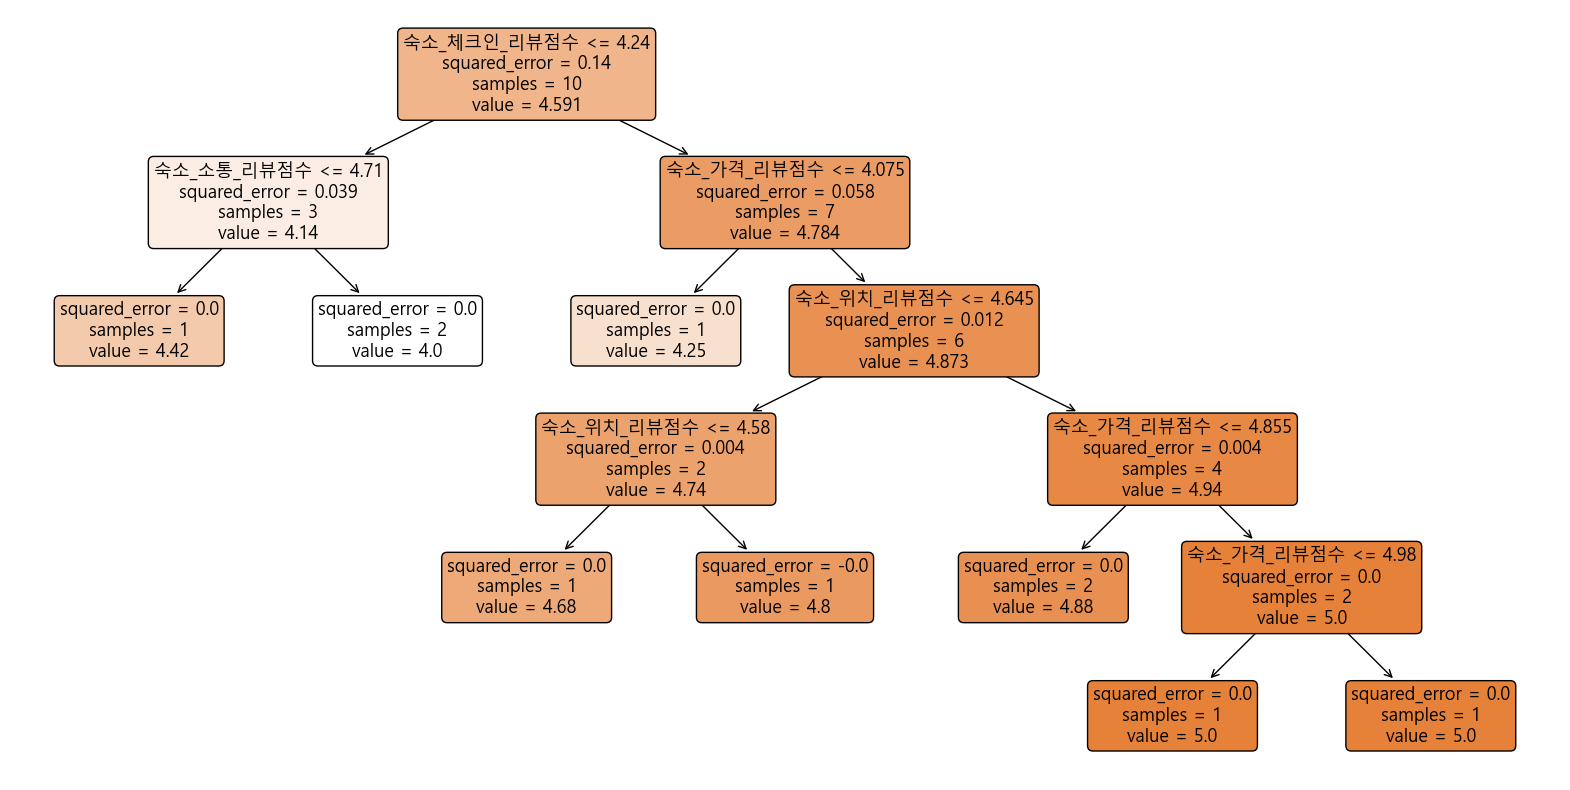

In [199]:

# 의사결정트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True)
plt.show()

모델 튜닝<br>
성능개선 : 최적의 파라미터 찾기 

In [200]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_cv = GridSearchCV(tree_model, param_grid = params, scoring='neg_mean_squared_error', cv = 5, return_train_score=True) # cv : cross validation

grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [201]:
# 최적의 모델
best_model = grid_cv.best_estimator_

print(f"최적 파라미터: {grid_cv.best_params_}")
print(f"최고 평균 정확도 : {grid_cv.best_score_}")

최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 평균 정확도 : -0.035918786060095007


모델 예측 및 평가

In [202]:
# 모델 예측
y_pred = best_model.predict(x_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
print(f'MSE(평균제곱오차): {mse}')

MSE(평균제곱오차): 0.03537155568954855


<h3>게스트선호 기준으로 모델링</h3>

In [203]:
numbric = ['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수','게스트선호']

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = london_lists[numbric]
y = london_lists['게스트선호']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 예측
y_pred = tree_model.predict(X_test)



모델 평가

In [205]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 1.0000


성능개선 : 최적의 파라미터 찾기 

In [206]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(tree_model, param_grid = params, scoring='accuracy', cv = 5, return_train_score=True) # cv : cross validation

grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [207]:
# 최적의 모델
best_model = grid_cv.best_estimator_

print(f"최고 파라미터: {grid_cv.best_params_}")
print(f"최고 평균 정확도: {grid_cv.best_score_}")

# 모델 예측
y_pred = best_model.predict(x_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy}')


최고 파라미터: {'max_depth': 8}
최고 평균 정확도: 0.894969957081545
정확도: 0.9008514144465806


중요 속성 확인

In [208]:
best_model.feature_importances_

array([0.2085122 , 0.10876869, 0.02691429, 0.043498  , 0.06610263,
       0.54620419])

In [209]:
feature_importance = best_model.feature_importances_


In [210]:
feature_importance = pd.Series(feature_importance, index=x_train.columns)
feature_importance

숙소_정확성_리뷰점수    0.208512
숙소_청결도_리뷰점수    0.108769
숙소_체크인_리뷰점수    0.026914
숙소_소통_리뷰점수     0.043498
숙소_위치_리뷰점수     0.066103
숙소_가격_리뷰점수     0.546204
dtype: float64

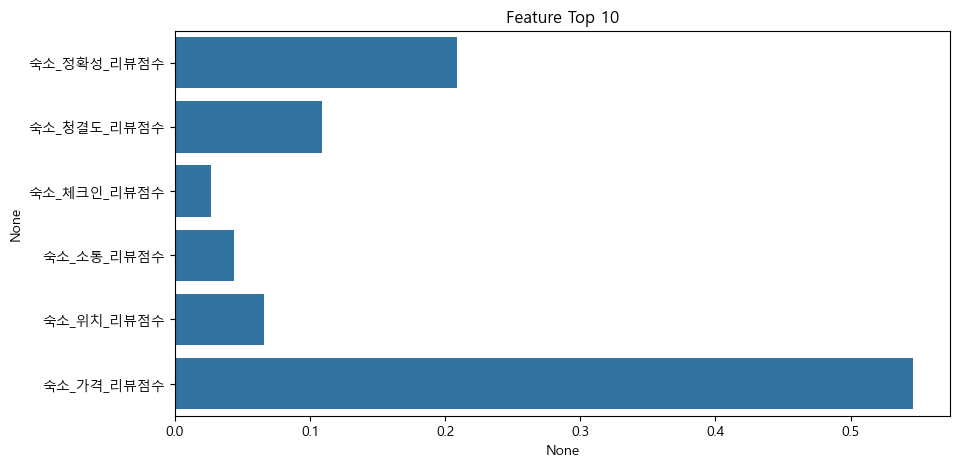

In [211]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x = feature_importance, y = feature_importance.index)
plt.show()

In [212]:
!pip install graphviz

In [213]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='best_tree.dot', class_names = ['Non-Preference', 'Preference'],
                feature_names = x_train.columns,filled=True)

- gini : 노드의 순수성 측정 (0에 가까우면 순수하다는 뜻 / 0.5에 가까우면 불순도가 높다)
- class : 노드에 포함된 샘플 중 가장 빈도수가 높으면 Preference 

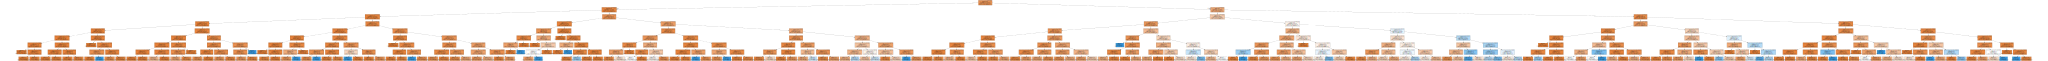

In [214]:
import graphviz

with open('best_tree.dot', 'r', encoding='utf-8') as file:
    dot_tree = file.read()

# Graphviz Source 객체 생성 및 사이즈 조정
graph = graphviz.Source(dot_tree, filename="best_tree.dot")

graph